In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data2.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### The above data is from a telecommunication company.

In [3]:
# Looking for missing data
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

state
False    3333
Name: state, dtype: int64

account length
False    3333
Name: account length, dtype: int64

area code
False    3333
Name: area code, dtype: int64

phone number
False    3333
Name: phone number, dtype: int64

international plan
False    3333
Name: international plan, dtype: int64

voice mail plan
False    3333
Name: voice mail plan, dtype: int64

number vmail messages
False    3333
Name: number vmail messages, dtype: int64

total day minutes
False    3333
Name: total day minutes, dtype: int64

total day calls
False    3333
Name: total day calls, dtype: int64

total day charge
False    3333
Name: total day charge, dtype: int64

total eve minutes
False    3333
Name: total eve minutes, dtype: int64

total eve calls
False    3333
Name: total eve calls, dtype: int64

total eve charge
False    3333
Name: total eve charge, dtype: int64

total night minutes
False    3333
Name: total night minutes, dtype: int64

total night calls
False    3333
Name: total night calls, dtype: 

In [4]:
# for loop to see unique values
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

state
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

account length
[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243 

In [31]:
# feature selection
X = df[["account length", "international plan", "total day charge", "total night charge", "total intl charge", "customer service calls", "state"]]
# target selection
y =df["churn"]
# review feature set
# X[0:5]
print(X)

      account length international plan  total day charge  total night charge  \
0                128                 no             45.07               11.01   
1                107                 no             27.47               11.45   
2                137                 no             41.38                7.32   
3                 84                yes             50.90                8.86   
4                 75                yes             28.34                8.41   
...              ...                ...               ...                 ...   
3328             192                 no             26.55               12.56   
3329              68                 no             39.29                8.61   
3330              28                 no             30.74                8.64   
3331             184                yes             36.35                6.26   
3332              74                 no             39.85               10.86   

      total intl charge  cu

In [32]:
# update state with one hot coding
X=pd.get_dummies(X, columns=["state"])
# make sure i am using feature set values 
X=X.values
# preprocess to update str variables to numerical variables
from sklearn import preprocessing
international_plan=preprocessing.LabelEncoder()
international_plan.fit(["no", "yes"])
X[:,1] = international_plan.transform(X[:,1])
print(X)

[[128 0 45.07 ... 0 0 0]
 [107 0 27.47 ... 0 0 0]
 [137 0 41.38 ... 0 0 0]
 ...
 [28 0 30.74 ... 0 0 0]
 [184 1 36.35 ... 0 0 0]
 [74 0 39.85 ... 0 0 0]]


In [17]:
# create training and testing set
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)


In [18]:
#create model using random forest classifier and fit the training set
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_trainset, y_trainset)

RandomForestClassifier()

In [19]:
#create prediction using the model
rf_pred = rf_model.predict(X_testset)
rf_pred[0:5]

array([False,  True, False, False, False])

In [20]:
# Looking at the accuracy score (using two methods)
from sklearn import metrics
rf_model.score(X_testset, y_testset)
metrics.accuracy_score(y_testset, rf_pred)

0.8950524737631185

In [21]:
# confusion matrics to find precision and recall
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, rf_pred)

array([[556,  17],
       [ 53,  41]], dtype=int64)

TN FP
FN TP

0.7068965517241379
0.43617021276595747
0.8482418031265085
0.5394736842105263


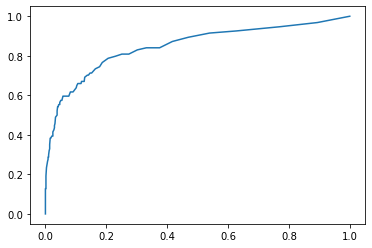

In [54]:
# Looking at the precision score
from sklearn.metrics import precision_score
print(precision_score(y_testset, rf_pred))

# Looking at the recall score
from sklearn.metrics import recall_score
print(recall_score(y_testset, rf_pred))

# find probability for each prediction
prob=rf_model.predict_proba(X_testset)[:,1]

# look at ROC curve, which gives us the false and true positive predictions
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_testset, prob)
plt.plot(fpr, tpr)

# Looking at the area under the curve
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(y_testset, prob)
print(auc)

#looking at the f1_score
from sklearn.metrics import f1_score
print(f1_score(y_testset, rf_pred))

In [38]:
# looking at the importance of each feature
importances=rf_model.feature_importances_

In [39]:
print(importances)

[0.10034993 0.07063494 0.26842604 0.11233783 0.11695518 0.13994525
 0.00280512 0.00255388 0.00396356 0.00289504 0.00443193 0.00329476
 0.00542247 0.00320384 0.00377019 0.00276023 0.0029162  0.00178958
 0.00372158 0.00362283 0.00366294 0.00489929 0.00428409 0.00226271
 0.00277149 0.00353442 0.00564481 0.00482599 0.00527967 0.00504461
 0.00242597 0.00509513 0.00353004 0.00537088 0.00306492 0.00244344
 0.00297642 0.00709799 0.00266105 0.00448164 0.00416279 0.00362355
 0.00168293 0.00485559 0.0028687  0.00175106 0.00513675 0.00348305
 0.00228632 0.00688235 0.0035372  0.0042957  0.00368164 0.00387637
 0.00348933 0.00367185 0.00355693]


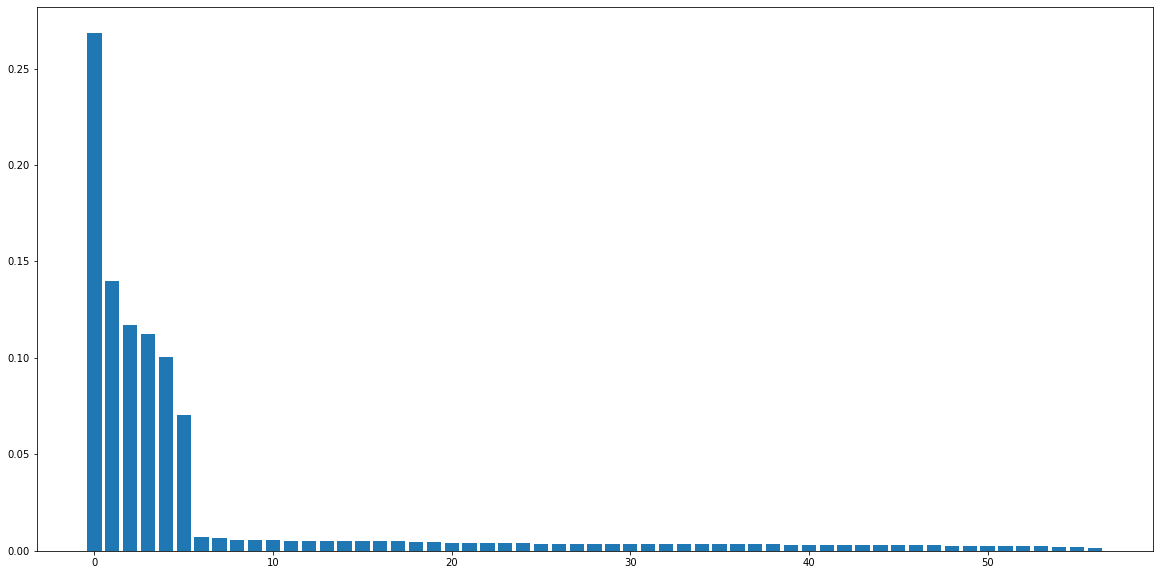

57

In [42]:
# visualize to see the feature importance
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(20,10))
plt.bar(range(X.shape[1]), importances[indices])
plt.show()
X.shape[1]

In [43]:

# creating the svm model and fitting training set
# make sure to update probability to True for proabbility evaluation
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(X_trainset, y_trainset)

SVC(probability=True)

In [44]:
svc_pred = svc_model.predict(X_testset)
svc_pred[0:5]

array([False, False, False, False, False])

In [45]:
# look at the accuracy score
svc_model.score(X_testset, y_testset)
metrics.accuracy_score(y_testset, svc_pred)

0.8590704647676162

In [47]:
# Look at the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_testset, svc_pred)

array([[573,   0],
       [ 94,   0]], dtype=int64)

C:\Users\Kunal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0
0.0
0.8482418031265085


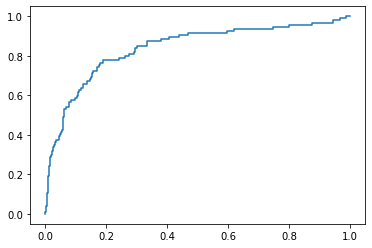

In [56]:
#precision score for svm
print(precision_score(y_testset, svc_pred))
# recall score for svm
print(recall_score(y_testset, svc_pred))
# probability for each prediction
prob_2=svc_model.predict_proba(X_testset)[:,1]
# look at ROC curve
fpr, tpr, thresholds=roc_curve(y_testset, prob_2)
plt.plot(fpr, tpr)
# area under the curve
auc=roc_auc_score(y_testset, prob)
print(auc)
